In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, rv_histogram

from tqdm import tqdm_notebook
from tqdm.notebook import tqdm


In [50]:
data_path = "./AER merged.csv"
# data_path = "./data_econ.csv"


df = pd.read_csv(data_path, index_col=0)

treatment = df.loc[df.treatment == 1]
control = df.loc[df.treatment == 0]

# printb basics about the dataframe
print(df.keys())
print(df.shape)

print("Number of treatment: {}".format(len(treatment)))
print("Number of control: {}".format(len(control)))


Index(['treatment', 'control', 'ratio', 'ratio2', 'ratio3', 'size', 'size25',
       'size50', 'size100', 'sizeno', 'ask', 'askd1', 'askd2', 'askd3', 'ask1',
       'ask2', 'ask3', 'amount', 'gave', 'amountchange', 'hpa', 'ltmedmra',
       'freq', 'years', 'year5', 'mrm2', 'dormant', 'female', 'couple',
       'state50one', 'nonlit', 'cases', 'statecnt', 'stateresponse',
       'stateresponset', 'stateresponsec', 'stateresponsetminc', 'perbush',
       'close25', 'red0', 'blue0', 'redcty', 'bluecty', 'pwhite', 'pblack',
       'page18_39', 'ave_hh_sz', 'median_hhincome', 'powner', 'psch_atlstba',
       'pop_propurban'],
      dtype='object')
(50083, 51)
Number of treatment: 33396
Number of control: 16687


          gave  amount  amountchange
ratio                               
1        11133   11133         11133
2        11134   11134         11134
3        11129   11129         11129
Control  16687   16687         16687


Text(0.5, 0, 'Treatment')

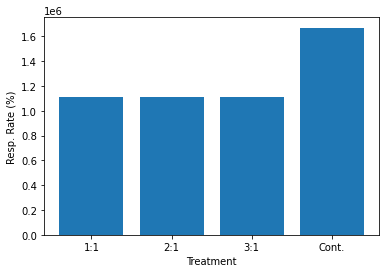

In [48]:
ratio_comp = df.groupby(
    ["ratio"]
).count().loc[:, ["gave", "amount", "amountchange"]]
print(ratio_comp)

plt.bar(["1:1", "2:1", "3:1", "Cont."], ratio_comp.gave.values * 100)
plt.ylabel("Resp. Rate (%)")
plt.xlabel("Treatment")

Text(0.5, 0, 'Treatment')

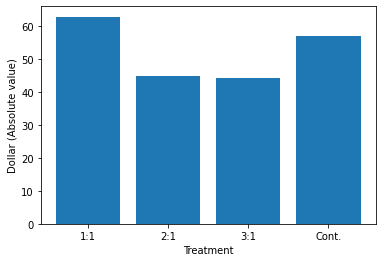

In [59]:
ratio_comp = df.groupby(
    ["ratio"]
).mean().loc[:, ["gave", "amount", "amountchange"]]

plt.bar(["1:1", "2:1", "3:1", "Cont."], np.abs(ratio_comp.amountchange.values))
# plt.errorbar([0, 1, 2, 3], ratio_comp.amount.values * np.array([2, 3, 4, 1]), yerr=std.amount.values, fmt="o")
plt.ylabel("Dollar (Absolute value)")
plt.xlabel("Treatment")

## The summary statistics

In [165]:
activities = [
    "freq", "years", "hpa", "mrm2", "dormant"
]
census = [
    "female", "couple"
]
county = [
    "red0", "redcty"
]
income = [
    "median_hhincome", "ave_hh_sz"
]
legal = [
    "nonlit", "cases"
]

subgroups_fields = [
    activities, census, county, income, legal
]

for field in subgroups_fields:
    mean_all = df[field].mean()
    mean_t = treatment[field].mean()
    mean_c = control[field].mean()

    std_all = df[field].std()
    std_t = treatment[field].std()
    std_c = control[field].std()

    for i in range(len(field)):
        print("{:.2f}({:.2f}) & {:.2f}({:.2f}) & {:.2f}({:.2f})".format(
            mean_all[i], std_all[i], mean_t[i], std_t[i], mean_c[i], std_c[i]
        ))

8.04(11.39) & 8.04(11.39) & 8.05(11.40)
6.10(5.50) & 6.08(5.44) & 6.14(5.63)
59.38(71.18) & 59.60(73.05) & 58.96(67.27)
13.01(12.08) & 13.01(12.09) & 13.00(12.07)
0.52(0.50) & 0.52(0.50) & 0.52(0.50)
0.28(0.45) & 0.28(0.45) & 0.28(0.45)
0.09(0.29) & 0.09(0.29) & 0.09(0.29)
0.40(0.49) & 0.41(0.49) & 0.40(0.49)
0.51(0.50) & 0.51(0.50) & 0.51(0.50)
54815.70(22027.32) & 54763.17(22074.82) & 54921.09(21932.01)
2.43(0.38) & 2.43(0.38) & 2.43(0.38)
2.47(1.96) & 2.48(1.97) & 2.45(1.95)
1.50(1.16) & 1.50(1.16) & 1.50(1.15)


## Distribution of all outcomes

In [262]:
def generate_pdf(all, t, c, xlabel, xlim, bins = 500):
    """Plot the pdf of all/treatment/control samples."""
    min = all.min()
    max = all.max()

    print("{}, {}".format(min, max))

    hist_all = np.histogram(all, bins=bins)
    hist_dict_all = rv_histogram(hist_all)
    hist_t = np.histogram(t, bins=bins)
    hist_dict_t = rv_histogram(hist_t)
    hist_c = np.histogram(c, bins=bins)
    hist_dict_c = rv_histogram(hist_c)

    x = np.linspace(min, max, 1000)
    fig, ax = plt.subplots(figsize=(8, 8))
    if min >= 0:
        ax.semilogx(x, hist_dict_all.cdf(x), label="All", linewidth = 6)
        ax.semilogx(x, hist_dict_t.cdf(x), label="Treatment", linewidth = 6)
        ax.semilogx(x, hist_dict_c.cdf(x), label="Control", linewidth = 6)
    else:
        ax.plot(x, hist_dict_all.cdf(x), label="All", linewidth = 6)
        ax.plot(x, hist_dict_t.cdf(x), label="Treatment", linewidth = 6)
        ax.plot(x, hist_dict_c.cdf(x), label="Control", linewidth = 6)

    # ax.set_xlabel(xlabel + "", fontsize=40)
    ax.set_ylabel("CDF", fontsize=40)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    if min < 0:
        ax.set_xlim([-1500, 275])
        plt.xticks([-1500, -500, 0, 275], fontsize=40)
    ax.grid(True)
    ax.legend(fontsize=40)

    fig.tight_layout() 

    return fig, ax


In [ ]:
xlim = [0, 50]

# For w/o matching
amount_all = df.amount
amount_t = treatment.amount
amount_c = control.amount
fig, ax = generate_pdf(amount_all, amount_t, amount_c, "", xlim)
fig.savefig("./proposal/report/amount.pdf")
fig.savefig("./proposal/report/amount.png")

# For matching
ratio_all = df.ratio.copy()
ratio_all[ratio_all == "Control"] = 0
amount_matching_all = df.amount * (ratio_all.astype("int32") + 1)
amount_matching_t = df.amount[df.treatment == 1]
amount_matching_c = df.amount[df.treatment == 0]
fig, ax = generate_pdf(amount_matching_all, amount_matching_t, amount_matching_c, "", xlim)
fig.savefig("./proposal/report/amount_matching.pdf")
fig.savefig("./proposal/report/amount_matching.png")

# For amountchange
amount_change_all = df.amountchange
amount_change_t = treatment.amountchange
amount_change_c = control.amountchange
fig, ax = generate_pdf(amount_change_all, amount_change_t, amount_change_c, "", [-1500, 0])
fig.savefig("./proposal/report/amount_change.pdf")
fig.savefig("./proposal/report/amount_change.png")

# Permutation testing for ratio and amount w/o matching

In [153]:
def permutation_test(X, Y, B = 1000000):
    """Permutation test using random shuffling

    Parameters:
    - X: Samples from distribution 1
    - Y: Samples from distributino 2
    - B: Number of simulations. Default: 1,000,000
    """
    diff_hat = X.mean() - Y.mean()

    full_series = np.concatenate([X, Y])
    nx = len(X)
    diff_boot_count = 0
    for i in tqdm(range(B)):
        np.random.shuffle(full_series)
        xx, yy = full_series[:nx], full_series[nx:]
        diff_boot = xx.mean() - yy.mean()
        if diff_boot > diff_hat:
            diff_boot_count += 1
            
    p_value_perm = diff_boot_count / B
    return p_value_perm
   

In [154]:
X = [0.225, 0.262, 0.217, 0.240, 0.230, 0.229, 0.235, 0.217]
Y = [0.209, 0.205, 0.196, 0.210, 0.202, 0.207, 0.224, 0.223, 0.220, 0.201]

X = np.array(X)
Y = np.array(Y)

p = permutation_test(X, Y)
print('Permutation test p-value: \t\t{}'.format(p))

  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation test p-value: 		0.000453


## Multiple outcomes (Wald, permutation)

In [155]:
# reponse rate
mean_t = treatment.gave.mean()
std_t = treatment.gave.std()
n_t = len(treatment)
mean_c = control.gave.mean()
std_c = control.gave.std()
n_c = len(control)

w = (mean_t - mean_c) / np.sqrt( std_t**2 / n_t + std_c**2 / n_c )
p = 2 * norm.cdf(-np.abs(w))
print("Wald, reponse rate, treatment v. control: p={}".format(p))

p_perm = permutation_test(treatment.gave, control.gave)
print("Permutation, reponse rate, treatment v. control: p={}".format(p_perm))

Wald, reponse rate, treatment v. control: p=0.001329835351778485


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation, reponse rate, treatment v. control: p=0.000806


In [ ]:
# dollars w/o matching, tested below.

In [156]:
# dollars w matching
amount_matching = treatment.amount * (treatment.ratio.astype("int32") + 1)
mean_t = amount_matching.mean()
std_t = amount_matching.std()
n_t = len(treatment)
mean_c = control.amount.mean()
std_c = control.amount.std()
n_c = len(control)

w = (mean_t - mean_c) / np.sqrt( std_t**2 / n_t + std_c**2 / n_c )
p = 2 * norm.cdf(-np.abs(w))
print("Wald, dollars w matching, treatment v. control: p={}".format(p))

p_perm = permutation_test(amount_matching, control.amount)
print("Permutation, dollars w matching, treatment v. control: p={}".format(p_perm))

Wald, dollars w matching, treatment v. control: p=2.0037306671094484e-38


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation, dollars w matching, treatment v. control: p=0.0


In [157]:
# amount change
mean_t = treatment.amountchange.mean()
std_t = treatment.amountchange.std()
n_t = len(treatment)
mean_c = control.amountchange.mean()
std_c = control.amountchange.std()
n_c = len(control)

w = (mean_t - mean_c) / np.sqrt( std_t**2 / n_t + std_c**2 / n_c )
p = 2 * norm.cdf(-np.abs(w))
print("Wald, amount change, treatment v. control: p={}".format(p))

p_perm = permutation_test(treatment.amountchange, control.amountchange)
print("Permutation, amount change, treatment v. control: p={}".format(p_perm))

Wald, amount change, treatment v. control: p=0.6374132289734216


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation, amount change, treatment v. control: p=0.225348


## Multiple subgroups (Wald, permutation)

In [132]:
red_state_red_county = df[(df.red0 == 1) & (df.redcty == 1)]
red_state_blue_county = df[(df.red0 == 1) & (df.bluecty == 1)]
blue_state_red_county = df[(df.blue0 == 1) & (df.redcty == 1)]
blue_state_blue_county = df[(df.blue0 == 1) & (df.bluecty == 1)]

subgroups = [
    red_state_red_county, red_state_blue_county, blue_state_red_county, blue_state_blue_county
]
groupnames = [
    "red_state_red_county", "red_state_blue_county", "blue_state_red_county", "blue_state_blue_county"
]

print("red_state_red_county: {}".format(len(red_state_red_county)))
print("red_state_blue_county: {}".format(len(red_state_blue_county)))
print("blue_state_red_county: {}".format(len(blue_state_red_county)))
print("blue_state_blue_county: {}".format(len(blue_state_blue_county)))

red_state_red_county: 13675
red_state_blue_county: 6553
blue_state_red_county: 11826
blue_state_blue_county: 17872


In [140]:
for i, subgroup_df in enumerate(subgroups):
    # Wald test
    treatment_ = subgroup_df[subgroup_df.treatment == 1].gave
    mean_subgroup_t = treatment_.mean()
    std_subgroup_t = treatment_.std()
    n_subgroup_t = len(treatment_)

    control_ = subgroup_df[subgroup_df.treatment == 0].gave
    mean_subgroup_c = control_.mean()
    std_subgroup_c = control_.std()
    n_subgroup_c = len(control_)

    w = (mean_subgroup_t - mean_subgroup_c) / np.sqrt( std_subgroup_t**2 / n_subgroup_t + std_subgroup_c**2 / n_subgroup_c )
    p = 2 * norm.cdf(-np.abs(w))
    print("Wald {}: p = {}".format(groupnames[i], p))

    # permutation test
    p_perm = permutation_test(treatment_, control_)
    print("Permutation {}: p = {}".format(groupnames[i], p_perm))


Wald red_state_red_county: p = 6.884771853520811e-05


/var/folders/w7/2ydh37z114v16ythfkxw50gc0000gn/T/ipykernel_9563/956327853.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(B)):


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation red_state_red_county: p = 5.4e-05
Wald red_state_blue_county: p = 0.03865109115304174


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation red_state_blue_county: p = 0.019215
Wald blue_state_red_county: p = 0.9935304538956141


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation blue_state_red_county: p = 0.478773
Wald blue_state_blue_county: p = 0.4898967002242357


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation blue_state_blue_county: p = 0.230464


## Multiple treatments (ratio) on amount w/o matching (Wald, permutation)

In [123]:
mean_t = treatment.amount.mean()
std_t = treatment.amount.std()
n_t = len(treatment)

mean_c = control.amount.mean()
std_c = control.amount.std()
n_c = len(control)

w = (mean_t - mean_c) / np.sqrt( std_t**2 / n_t + std_c**2 / n_c )
p = 2 * norm.cdf(-np.abs(w))
print("Wald on treatment v. control: {}".format(p))

p_perm = permutation_test(treatment.amount, control.amount)
print("Permutation on treatment v. control: {}".format(p_perm))

Wald on treatment v. control: 0.05507771611574072


/var/folders/w7/2ydh37z114v16ythfkxw50gc0000gn/T/ipykernel_9563/956327853.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(B)):


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation on treatment v. control: 0.05507771611574072


In [128]:
mean_t = []
std_t = []
n_t = []
for r in range(1, 4):
    df_t = treatment[treatment.ratio == str(r)]
    mean_t.append(df_t.amount.mean())
    std_t.append(df_t.amount.std())
    n_t.append(len(df_t))

comb = [(0, 1), (0, 2), (1, 2)]
for i, j in comb:
    w = (mean_t[i] - mean_t[j]) / np.sqrt( std_t[i]**2 / n_t[i] + std_t[j]**2 / n_t[j] )
    p = 2 * norm.cdf(-np.abs(w))
    print("Wald, Ratio {}:1 vs {}:1, p-value = {}".format(
        i + 1, j + 1, p
    ))

    p_perm = permutation_test(treatment[treatment.ratio == str(i + 1)].amount, treatment[treatment.ratio == str(j + 1)].amount)
    print("Permutation, Ratio {}:1 vs {}:1, p-value = {}".format(
        i + 1, j + 1, p_perm
    ))

Wald, Ratio 1:1 vs 2:1, p-value = 0.47538635630952153


/var/folders/w7/2ydh37z114v16ythfkxw50gc0000gn/T/ipykernel_9563/956327853.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(B)):


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation, Ratio 1:1 vs 2:1, p-value = 0.760996
Wald, Ratio 1:1 vs 3:1, p-value = 0.9923973757232734


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation, Ratio 1:1 vs 3:1, p-value = 0.503898
Wald, Ratio 2:1 vs 3:1, p-value = 0.45227216051365493


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation, Ratio 2:1 vs 3:1, p-value = 0.226755


In [265]:
mean_c = control.amount.mean()
std_c = control.amount.std()
n_c = len(control)

mean_t = []
std_t = []
n_t = []
for r in range(1, 4):
    df_t = treatment[treatment.ratio == str(r)]
    mean_t.append(df_t.amount.mean())
    std_t.append(df_t.amount.std())
    n_t.append(len(df_t))

for i in range(len(mean_t)):
    print("Difference : {}".format(mean_c - mean_t[i]))

    w = (mean_c - mean_t[i]) / np.sqrt( std_c**2 / n_c + std_t[i]**2 / n_t[i] )
    p = 2 * norm.cdf(-np.abs(w))
    print("Wald, Control vs {}:1, p-value = {}".format(
        i + 1, p
    ))

    p_perm = permutation_test(control.amount, treatment[treatment.ratio == str(i + 1)].amount)
    print("Permutation,Control vs {}:1, p-value = {}".format(
        i + 1, p_perm
    ))

Difference : -0.12340693747322684
Wald, Control vs 1:1, p-value = 0.2567913553455671


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation,Control vs 1:1, p-value = 0.877033
Difference : -0.2128683462435932
Wald, Control vs 2:1, p-value = 0.050825483100076806


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation,Control vs 2:1, p-value = 0.976661
Difference : -0.1245253397558187
Wald, Control vs 3:1, p-value = 0.2118147535318512


  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation,Control vs 3:1, p-value = 0.892891


In [267]:
p_perm = permutation_test(control.amount, treatment[treatment.ratio == '2'].amount)
print("Permutation, Control vs {}:1, p-value = {}".format(
    i + 1, p_perm
))

  0%|          | 0/1000000 [00:00<?, ?it/s]

Permutation, Control vs 3:1, p-value = 0.976454


## Correlation

In [276]:
df_sub = df.copy()
df_sub["amountmatching"] = amount_matching_all

fields_interested = [
    "gave", "amount", "amountmatching", "amountchange",
    "red0", "redcty", "female", "median_hhincome", "treatment"
]
df_sub = df_sub[fields_interested]
df_sub = df_sub[~(df_sub.red0.isna() | df_sub.redcty.isna() | df_sub.female.isna() | df_sub.median_hhincome.isna())]

normed = ((df_sub - df_sub.mean()) / df_sub.std()).values
corr = np.matmul(normed.T, normed) / len(df_sub)

corr_df = pd.DataFrame(corr, index=fields_interested, columns=fields_interested)

print(corr_df)


                     gave    amount  amountmatching  amountchange      red0  \
gave             0.999979  0.723482        0.670970      0.005960  0.000881   
amount           0.723482  0.999979        0.906327      0.005213  0.004619   
amountmatching   0.670970  0.906327        0.999979      0.004854  0.008707   
amountchange     0.005960  0.005213        0.004854      0.999979 -0.000793   
red0             0.000881  0.004619        0.008707     -0.000793  0.999979   
redcty           0.006353  0.001958        0.000681      0.007425  0.275841   
female           0.005057 -0.006238       -0.006064      0.005072 -0.017212   
median_hhincome -0.001072  0.014318        0.010945     -0.003566 -0.237587   
treatment        0.015319  0.009104        0.044156      0.002413  0.009363   

                   redcty    female  median_hhincome  treatment  
gave             0.006353  0.005057        -0.001072   0.015319  
amount           0.001958 -0.006238         0.014318   0.009104  
amountmatch

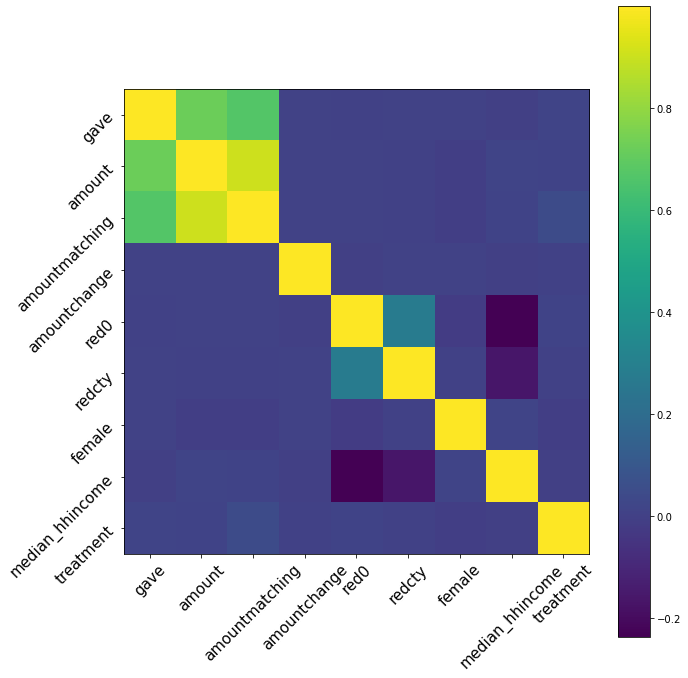

In [301]:
plt.figure(figsize=(10, 10))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(fields_interested)), fields_interested, rotation=45, fontsize=15)
plt.yticks(range(len(fields_interested)), fields_interested, rotation=45, fontsize=15)

plt.colorbar()
plt.tight_layout()
plt.savefig("./proposal/report/corr-heatmap.pdf")
plt.show()


In [8]:
import numpy as np
np.arange(5, 0, -1)

array([5, 4, 3, 2, 1])